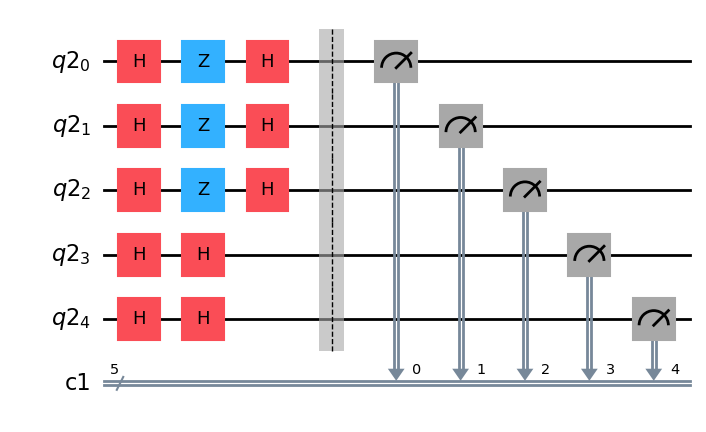

{'00111': 1000}


In [2]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
# import randrange for random choices
from random import randrange

number_of_qubit = 5

# define a quantum register with 5 qubits
q =  QuantumRegister(number_of_qubit)

# define a classical register with 5 bits
c = ClassicalRegister(number_of_qubit)

# define our quantum circuit
qc = QuantumCircuit(q,c)

# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])

# apply z-gate to randomly picked qubits
for i in range(number_of_qubit):
    if randrange(2) == 0: # the qubit with index i is picked to apply z-gate
        qc.z(q[i])
        
# apply h-gate to all qubits
for i in range(number_of_qubit):
    qc.h(q[i])
    
qc.barrier()
    
# measure all qubits
qc.measure(q,c)

# draw the circuit
display(qc.draw(output='mpl'))  # execute the circuit 1000 times in the local simulator
job = AerSimulator().run(qc,shots=1000)
counts = job.result().get_counts(qc)
print(counts)